## CSC 203 Final Project: **Word Scramble Game**

#### This writes a word scramble game that can be played repeatedly. It will scramble the letters of words 4-7 letters long.
#### It has 4 levels with different length words, and a menu to edit the word list.
#### After you finish running the game, it will give you your score and a visual of how you did

In [1]:
import pandas as pd
import random
import re
import matplotlib.pyplot as plt
import pyfiglet # For a large font

In [2]:
words = pd.read_excel('Word-Scrambler-Features.xlsx')
syll7 = words['SEVEN'].tolist()
syll6 = words['SIX'].tolist()
syll5 = words['FIVE'].tolist()
syll4 = words['FOUR'].tolist()

In [3]:
word_list = []
wins = 0
atts = 0
end = False
menu = True
mrepeat = True
whist = []
ahist = []

In [4]:
def Game(word_list): # Function for the actual word game itself, regardless of word size
    global wins, atts
    
    rand_word = random.choice(word_list)
    scrambled = ''.join(random.sample(rand_word, len(rand_word)))
    while scrambled.lower() == rand_word.lower():
        scrambled = ''.join(random.sample(rand_word, len(rand_word))) # Rescrambles if the word is still unscrambled
    
    print('Unscramble the word below:\n', scrambled, '\nGuess:')
    guess = input('Your guess: ').strip()
    print('ANSWER:', rand_word)
    
    if guess.lower() == rand_word.lower():
        print('Congratulations! You guessed correctly!')
        wins += 1
    else:
        print('Nice try, better luck next time!')
    atts += 1
    ahist.append(atts)
    whist.append(wins)

In [5]:
def PickList(word, lst1, lst2, lst3, lst4): # Function to pick what list word is from based on # of chars
    if re.fullmatch(r'[A-Za-z]{4}$', word):        # Needs specific list order
        return lst1
    elif re.fullmatch(r'[A-Za-z]{5}$', word):
        return lst2
    elif re.fullmatch(r'[A-Za-z]{6}$', word):
        return lst3
    elif re.fullmatch(r'[A-Za-z]{7}$', word):
        return lst4

In [6]:
def GameStack(lst1, lst2, lst3, lst4): # Stacks the original game into 4 levels based on word size
    global end, menu, mrepeat          # Also adds word edit menu & game exit menu & lots of input validation

    while end == False:
        print('LEVEL 1:\n')
        Game(lst1)
        
        print('LEVEL 2:\n')
        Game(lst2)

        print('LEVEL 3:\n')
        Game(lst3)
    
        print('LEVEL 4:\n')
        Game(lst4)

        print('SCORE:', wins, "/", atts)

        # Edit menu:
        while mrepeat == True:
            print('ADD, DELETE, OR CHANGE A WORD?\nNO -> N\t\tADD -> A\tDELETE -> D\tCHANGE -> C')
            menu_char = str(input()).strip()
            while menu_char.lower() not in ['n', 'a', 'd', 'c']:
                print('ERROR\tPLEASE INPUT A CHARACTER LISTED FROM THE MENU:')
                menu_char = str(input()).strip()
            
            if menu_char.lower() == 'a':
                menu = True
                print('\nINPUT WORD TO ADD:')
                add = str(input()).strip().upper()
                pick = PickList(add, syll4, syll5, syll6, syll7)
                pick.append(add)
        
            elif menu_char.lower() == 'd':
                menu = True
                print('\nINPUT WORD TO DELETE:')
                delete = str(input()).strip()
                pick = PickList(delete, syll4, syll5, syll6, syll7)
                for i in pick:
                    if i.lower() == delete.lower():
                        pick.remove(i)
                        break # found and ends
        
            elif menu_char.lower() == 'c':
                menu = True
                print('\nINPUT WORD TO CHANGE:')
                change = input().strip().upper()
                pick = PickList(change, syll4, syll5, syll6, syll7)
                print('CHANGE TO WHAT?')
                found = False
                made = input().strip().upper()
                for i, word in enumerate(pick):
                    if word.lower() == change.lower():
                        pick[i] = made
                        found = True
                        break # found
                if not found:
                    print('ERROR\tWORD INPUT NOT FOUND')
        
            else:
                menu = False
                mrepeat = False
                print('Good.')

            # Edit menu looping:
            while menu == True:
                print('\nADD, DELETE, OR CHANGE ANOTHER WORD? (Type Y or N):')
                yesno = str(input()).strip()
                while yesno.lower() not in ['y', 'n']:
                    print('ERROR\tPLEASE ENTER Y OR N:')
                    yesno = str(input()).strip()
                if yesno.lower() == 'n':
                    menu = False
                    mrepeat = False
                elif yesno.lower() == 'y':
                    menu = False
                    mrepeat = True

        # Exit menu:
        print('END OF GAME -- PLAY AGAIN?\nType Y or N')
        end_char = str(input()).strip()
        while end_char.lower() not in ['y', 'n']:
            print('ERROR\tPLEASE ENTER Y OR N:')
            end_char = str(input()).strip()
        if end_char.lower() == 'y':
            mrepeat = True
            menu = True
        else:
            end = True

In [7]:
def StatsVis(wlist, alist):
    big = pyfiglet.figlet_format('STATS:') # Large text
    print(big)

    # Line plot (wins against attempts):
    plt.figure(figsize = (3, 2))
    plt.plot(alist, wlist, color = 'red', marker = 'o')
    plt.grid(True)
    plt.xlabel("Plays")
    plt.ylabel("Wins")
    plt.title("Player Progress:")

    # Bar plot (wins vs losses):
    ws = wlist[-1]
    atts = alist[-1]
    ls = atts - ws
    labels = ['Wins', 'Losses']
    values = [ws, ls]
    colors = ['green', 'red']

    plt.figure(figsize = (3, 2))
    plt.pie(values, labels = labels, colors = colors)
    plt.title("Overall Accuracy:")

    plt.show()

LEVEL 1:

Unscramble the word below:
 GEED 
Guess:


Your guess:  edge


ANSWER: EDGE
Congratulations! You guessed correctly!
LEVEL 2:

Unscramble the word below:
 IOEVL 
Guess:


Your guess:  olive


ANSWER: OLIVE
Congratulations! You guessed correctly!
LEVEL 3:

Unscramble the word below:
 EITRVU 
Guess:


Your guess:  virtue


ANSWER: VIRTUE
Congratulations! You guessed correctly!
LEVEL 4:

Unscramble the word below:
 MEGTIEN 
Guess:


Your guess:  meeting


ANSWER: MEETING
Congratulations! You guessed correctly!
SCORE: 4 / 4
ADD, DELETE, OR CHANGE A WORD?
NO -> N		ADD -> A	DELETE -> D	CHANGE -> C


 C



INPUT WORD TO CHANGE:


 MEETING


CHANGE TO WHAT?


 SEATING



ADD, DELETE, OR CHANGE ANOTHER WORD? (Type Y or N):


 n


END OF GAME -- PLAY AGAIN?
Type Y or N


 y


LEVEL 1:

Unscramble the word below:
 BUYS 
Guess:


Your guess:  busy


ANSWER: BUSY
Congratulations! You guessed correctly!
LEVEL 2:

Unscramble the word below:
 NSNYU 
Guess:


Your guess:  sunny


ANSWER: SUNNY
Congratulations! You guessed correctly!
LEVEL 3:

Unscramble the word below:
 YKCHEO 
Guess:


Your guess:  chokey


ANSWER: HOCKEY
Nice try, better luck next time!
LEVEL 4:

Unscramble the word below:
 ENEWOHR 
Guess:


Your guess:  howener


ANSWER: NOWHERE
Nice try, better luck next time!
SCORE: 6 / 8
ADD, DELETE, OR CHANGE A WORD?
NO -> N		ADD -> A	DELETE -> D	CHANGE -> C


 d



INPUT WORD TO DELETE:


 BUSY



ADD, DELETE, OR CHANGE ANOTHER WORD? (Type Y or N):


 a


ERROR	PLEASE ENTER Y OR N:


 n


END OF GAME -- PLAY AGAIN?
Type Y or N


 y


LEVEL 1:

Unscramble the word below:
 ASTL 
Guess:


Your guess:  last


ANSWER: SALT
Nice try, better luck next time!
LEVEL 2:

Unscramble the word below:
 SDTYU 
Guess:


Your guess:  dusty


ANSWER: STUDY
Nice try, better luck next time!
LEVEL 3:

Unscramble the word below:
 LLAODR 
Guess:


Your guess:  dollar


ANSWER: DOLLAR
Congratulations! You guessed correctly!
LEVEL 4:

Unscramble the word below:
 EFRORVE 
Guess:


Your guess:  forever


ANSWER: FOREVER
Congratulations! You guessed correctly!
SCORE: 8 / 12
ADD, DELETE, OR CHANGE A WORD?
NO -> N		ADD -> A	DELETE -> D	CHANGE -> C


 a



INPUT WORD TO ADD:


 BUSH



ADD, DELETE, OR CHANGE ANOTHER WORD? (Type Y or N):


 y


ADD, DELETE, OR CHANGE A WORD?
NO -> N		ADD -> A	DELETE -> D	CHANGE -> C


 c



INPUT WORD TO CHANGE:


 SALT


CHANGE TO WHAT?


 SINK



ADD, DELETE, OR CHANGE ANOTHER WORD? (Type Y or N):


 y


ADD, DELETE, OR CHANGE A WORD?
NO -> N		ADD -> A	DELETE -> D	CHANGE -> C


 c



INPUT WORD TO CHANGE:


 STUDY


CHANGE TO WHAT?


 STUNT



ADD, DELETE, OR CHANGE ANOTHER WORD? (Type Y or N):


 n


END OF GAME -- PLAY AGAIN?
Type Y or N


 n


TOTAL SCORE: 8 / 12
 
 ____ _____  _  _____ ____   
/ ___|_   _|/ \|_   _/ ___|_ 
\___ \ | | / _ \ | | \___ (_)
 ___) || |/ ___ \| |  ___) | 
|____/ |_/_/   \_\_| |____(_)
                             



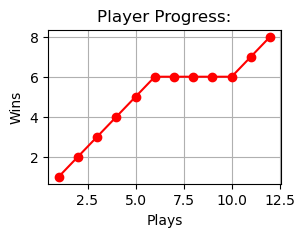

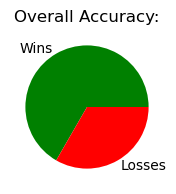

In [8]:
while end == False:
    GameStack(syll4, syll5, syll6, syll7)
if end == True:
    print("TOTAL SCORE:", wins, "/", atts)
    print(" ")
    StatsVis(whist, ahist)